In [59]:
from importlib import reload

import matplotlib.pyplot as plt

import torch
from PIL import Image
import torchvision.transforms as T

import multicrop
import constants
import data
reload(multicrop)
reload(data)
reload(constants)
from multicrop import MultiCrop
from data import load_data 
from constants import *



BATCH_SZ = 3
SPLIT = [1, 0.0, 0.0]



train_dl, val_dl, test_dl  = load_data(f"{DATA_DIR}/Labels/all_pruned.csv", 
                                       batch_sz=BATCH_SZ,
                                       train_val_test_split=SPLIT)


/root/depmbt/data.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.dataset.iloc[item][0], [self.dataset.iloc[item][i] for i in range(1, num_labels + 1)]
/root/miniconda/envs/depmbt/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/root/miniconda/envs/depmbt/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/root/miniconda/envs/depmbt/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


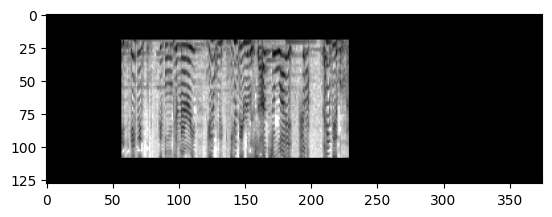

In [64]:
def get_image_seq(crops, i, rgb=True):
    if rgb:
        image_seq = [ 
            crops[i][j].reshape(FRAMES, CHANS, HEIGHT, WIDTH)
                            .swapaxes(1, 3)
                            .swapaxes(2, 1)[k]
                for j in range(BATCH_SZ) for k in range(3)
        ]

    else:
        image_seq = [
            crops[i][j].reshape(CHANS, NUM_MELS, MAX_SPEC_SEQ_LEN)
                       .swapaxes(0, 2)
                       .swapaxes(1, 0)
                for j in range(BATCH_SZ)
        ]

    print (image_seq[0].shape)
    return image_seq


for teacher_rgb, student_rgb, teacher_spec, student_spec in train_dl:
    # crops = teacher_spec
    # crops = student_spec
    # crops = teacher_rgb
    # global_crop_seq = []
    # for i in range(len(crops)):
    #     image_seq_rgb = get_image_seq(crops, i, rgb=False)
    #     stacked_frames = torch.cat(image_seq_rgb, dim=0)
    #     global_crop_seq.append(stacked_frames)
    # global_stacked = torch.cat(global_crop_seq, dim=1)

    for video, audio in zip(teacher_rgb, teacher_spec):
        video_frame = video[0].reshape(FRAMES, CHANS, HEIGHT, WIDTH).swapaxes(1, 3).swapaxes(2, 1)[0]
        audio_frame = audio[0].swapaxes(0, 2).swapaxes(1, 0)
        break
    break

plt.imshow(audio_frame)
plt.imshow(video_frame)

    # total_items = len(global_crops) + len(local_crops)
# stacked_local = torch.cat(local_crops, dim=2)
# plt.imshow(stacked_global.swapaxes(0, 2).swapaxes(0, 1))
# plt.imshow(stacked_local.swapaxes(0, 2).swapaxes(0, 1))